In [1]:
# Suggested imports. Do not use import any modules that are not in the requirements.txt file on the VLE.

%matplotlib inline

import numpy as np
import pandas as pd
import torch
import collections
import random
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.metrics

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

# Movie titles assignment

Table of contents:

* [Data filtering and splitting (10%)](#Data-filtering-and-splitting-(10%))
* [Title classification (25%)](#Title-classification-(25%))
* [Title generation (25%)](#Title-generation-(25%))
* [Language models as classifiers (30%)](#Language-models-as-classifiers-(30%))
* [Conclusion (10%)](#Conclusion-(10%))

Information:

This assignment is 100% of your assessment.
You are to follow the instructions below and fill each cell as instructed.
Once ready, submit this notebook on VLE with all the outputs included (run all your code and don't clear any output cells).
Do not submit anything else apart from the notebook and do not use any extra data apart from what is requested.

## Introduction

A big shot Hollywood producer is looking for a way to automatically generate new movie titles for future movies and you have been employed to do this (in exchange for millions of dollars!).
A data set of movie details has already been collected from IMDb for you and your task is to create the model and the algorithms necessary to use it.

## Data filtering and splitting (10%)

Start by downloading the CSV file `filmtv_movies - ENG.csv` from [this kaggle data set](https://www.kaggle.com/datasets/stefanoleone992/filmtv-movies-dataset).

The CSV file needs to be filtered as the producer is only interested in certain types of movie titles.
Load the file and filter it so that only movies with the following criteria are kept:

* The country needs to be `United States` (and no other country should be mentioned).
* The genre should be `Action`, `Horror`, `Fantasy`, `Western`, and `Adventure`.
* The title should not have more than 20 characters.

In [2]:
df = pd.read_csv('./filmtv_movies - ENG.csv')
df =df[df.country=="United States"]
newdf = df[df.genre.isin(["Action","Horror","Fantasy","Western","Adventure"])]
newdf= newdf[newdf.title.str.len()<=20]

In [3]:
newdf



,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,erotism
13,36,Bowery at Midnight,1942,Horror,62,United States,Wallace Fox,"Bela Lugosi, John Archer, Wanda McKay, Dave O'...",5.1,5.00,5.0,27,In the infamous New York neighborhood of Bower...,"Defined by critics as shaky, Wallace W. Fox's ...",0,2,1,3,0
15,38,Mr. Majestyk,1974,Action,105,United States,Richard Fleischer,"Charles Bronson, Linda Cristal, Al Lettieri, L...",6.2,5.71,7.0,28,"A veteran of Vietnam, Vince (Bronson) grows me...",Cliché screenplay (by Elmore Leonard) tailored...,0,4,3,3,0
16,45,Warning Sign,1985,Action,99,United States,Hal Barwood,"Sam Waterston, Kathleen Quinlan, Yaphet Kotto,...",4.8,4.00,6.0,10,"Inside the Biotek laboratory, a renowned and r...","It is a film that mixes ""The invasion of the b...",0,2,1,1,0
25,61,The Appaloosa,1966,Western,98,United States,Sidney J. Furie,"Marlon Brando, Anjanette Comer, John Saxon, Em...",6.9,7.00,7.0,26,"On the Mexican frontier, a dramatic rivalry be...",A very original western for the subject and fo...,0,2,1,3,1
32,74,The Deep,1977,Adventure,130,United States,Peter Yates,"Nick Nolte, Jacqueline Bisset, Robert Shaw, El...",5.3,4.88,6.0,30,"A boy and a girl, passionate divers, dive off ...","Not very exciting, but the underwater scenes a...",1,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40020,218528,House of Darkness,2022,Horror,88,United States,Neil LaBute,"Kate Bosworth, Justin Long, Gia Crovatin, Lucy...",4.0,4.00,NaN,1,Hap (Justin Long) and Mina (Kate Bosworth) mee...,NaN,2,3,0,2,1
40022,218530,Nix,2022,Horror,103,United States,Anthony C. Ferrante,"James Zimbardi, Dee Wallace, Michael Paré, Ang...",1.0,1.00,NaN,1,Jack Coyle (James Zimbardi) desperately tries ...,NaN,0,2,1,2,0
40033,219060,Matriarch,2022,Horror,85,United States,Ben Steiner,"Jemima Rooper, Kate Dickie, Sarah Paul, Simon ...",5.9,7.00,5.0,5,"Laura (Jemima Rooper) leads a lonely life, imm...",NaN,0,2,2,3,0
40034,219063,The Inhabitant,2022,Horror,97,United States,Jerren Lauder,"Odessa A’zion, Leslie Bibb, Dermot Mulroney, L...",6.0,6.00,NaN,1,"From a fact of the news, which took place in F...",NaN,0,3,1,3,0


Split the filtered data into 80% train, 10% validation, and 10% test.
You will only need the title and genre columns.

In [4]:
from sklearn.model_selection import train_test_split
train_size=0.8
x=newdf['title']
y=newdf['genre']

In [5]:
# Splitting data into training 80% and remaning data 20%
x_train, x_rem, y_train, y_rem = train_test_split(x,y,random_state=0 ,train_size=0.8)

test_size = 0.5
# Splitting data into test 10% validation 10%
x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem,random_state=0,test_size=0.5)

In [6]:
d_train={'title': x_train, 'genre': y_train}
d_test={'title': x_test, 'genre': y_test}
d_validation={'title': x_valid, 'genre': y_valid}

train = pd.DataFrame(d_train)
test= pd.DataFrame(d_test)
validation = pd.DataFrame(d_validation)

In [7]:
train

,title,genre
21617,V: The Final Battle,Fantasy
11127,A Day of Fury,Western
28999,Bounty Killer,Action
6565,Alien 3,Fantasy
9421,Seventh Cavalry,Western
...,...,...
7742,The Red Pony,Adventure
38337,The Burning,Horror
16663,Stranded,Action
29296,Christmas Bounty,Action


In [8]:
test

,title,genre
17423,3 Bad Men,Western
14306,Robinson Crusoe,Adventure
10002,Last of the Dogmen,Action
11609,Money Train,Action
31012,Joy Ride 3,Horror
...,...,...
13015,Bionic Ever After?,Fantasy
9236,Chief Crazy Horse,Western
19519,The Three Outlaws,Western
9279,Wolf,Horror


From your processed data set, display:

* the amount of movies in each genre and split
* 5 examples of movie titles from each genre and split

In [9]:
# From training set 
print("Working with the Training set")
print()

print("The amount of Action movies from the training set",len(train[train.genre=="Action"]))
print("The amount of Horror movies from the training set",len(train[train.genre=="Horror"]))
print("The amount of Fantasy movies from the training set",len(train[train.genre=="Fantasy"]))
print("The amount of Western movies from the training set",len(train[train.genre=="Western"]))
print("The amount of Adventure movies from the training set",len(train[train.genre=="Adventure"]))


# print("The amount of Horror movies from the training set",len(y_train[y_train=="Horror"]))
# print("The amount of Fantasy movies from the training set",len(y_train[y_train=="Fantasy"]))
# print("The amount of Western movies from the training set",len(y_train[y_train=="Western"]))
# print("The amount of Adventure movies from the training set",len(y_train[y_train=="Adventure"]))



# # From test set
print()
print("Working with the Testing set")
print()

print("The amount of Action movies from the test set",len(test[test.genre=="Action"]))
print("The amount of Horror movies from the test set",len(test[test.genre=="Horror"]))
print("The amount of Fantasy movies from the test set",len(test[test.genre=="Fantasy"]))
print("The amount of Western movies from the test set",len(test[test.genre=="Western"]))
print("The amount of Adventure movies from the test set",len(test[test.genre=="Adventure"]))

# print("The amount of Action movies from the testing set",len(y_test[y_test=="Action"]))
# print("The amount of Horror movies from the testing set",len(y_test[y_test=="Horror"]))
# print("The amount of Fantasy movies from the testing set",len(y_test[y_test=="Fantasy"]))
# print("The amount of Western movies from the testing set",len(y_test[y_test=="Western"]))
# print("The amount of Adventure movies from the testing set",len(y_test[y_test=="Adventure"]))

# # From validation set

print()
print("Working with the Validation set")
print()

print("The amount of Action movies from the validation set",len(validation[validation.genre=="Action"]))
print("The amount of Horror movies from the validation set",len(validation[validation.genre=="Horror"]))
print("The amount of Fantasy movies from the validation set",len(validation[validation.genre=="Fantasy"]))
print("The amount of Western movies from the validation set",len(validation[validation.genre=="Western"]))
print("The amount of Adventure movies from the validation set",len(validation[validation.genre=="Adventure"]))

# print("The amount of Action movies from the validation set",len(y_valid[y_valid=="Action"]))
# print("The amount of Horror movies from the validation set",len(y_valid[y_valid=="Horror"]))
# print("The amount of Fantasy movies from the validation set",len(y_valid[y_valid=="Fantasy"]))
# print("The amount of Western movies from the validation set",len(y_valid[y_valid=="Western"]))
# print("The amount of Adventure movies from the validation set",len(y_valid[y_valid=="Adventure"]))

Working with the Training set

The amount of Action movies from the training set 729
The amount of Horror movies from the training set 758
The amount of Fantasy movies from the training set 435
The amount of Western movies from the training set 424
The amount of Adventure movies from the training set 390

Working with the Testing set

The amount of Action movies from the test set 91
The amount of Horror movies from the test set 76
The amount of Fantasy movies from the test set 63
The amount of Western movies from the test set 63
The amount of Adventure movies from the test set 49

Working with the Validation set

The amount of Action movies from the validation set 94
The amount of Horror movies from the validation set 92
The amount of Fantasy movies from the validation set 61
The amount of Western movies from the validation set 51
The amount of Adventure movies from the validation set 44


In [10]:
# df["combines"] = df[['Courses', 'Duration']].agg('-'.join, axis=1)
# #print(len(y_train))
# #print(x_train[x_train=="Action"])
# print(x_train.iloc[0:1])
# print(y_train.sample(n=5))
# #print(len(y_train))
train.iloc[0:5]

,title,genre
21617,V: The Final Battle,Fantasy
11127,A Day of Fury,Western
28999,Bounty Killer,Action
6565,Alien 3,Fantasy
9421,Seventh Cavalry,Western


In [11]:
print(train)#, print(y_train)

                     title      genre
21617  V: The Final Battle    Fantasy
11127        A Day of Fury    Western
28999        Bounty Killer     Action
6565               Alien 3    Fantasy
9421       Seventh Cavalry    Western
...                    ...        ...
7742          The Red Pony  Adventure
38337          The Burning     Horror
16663             Stranded     Action
29296     Christmas Bounty     Action
30778   The Lazarus Effect     Horror

[2736 rows x 2 columns]


## Title classification (25%)

Your first task is to prove that a neural network can identify the genre of a movie based on its title.

You will note that many titles are just a single word or two words long so you need to work at the character level instead of the word level, that is, a token would be a single character, including punctuation marks and spaces.
You must also lowercase the titles.
Preprocess the data sets, create a neural network, and train it to classify the movie titles into their genre.
Plot a graph of the **accuracy** of the model on the train and validation sets after each epoch.

In [12]:
 # converting to lowercase

train['title']=train['title'].str.lower()
test['title']=test['title'].str.lower()
validation['title']=validation['title'].str.lower()

# tokenizing into characters

train_lower_char=[list(title) for title in train['title']]
test_lower_char=[list(title) for title in test['title']]
validation_lower_char=[list(title) for title in validation['title']]

#print(train_lower_char)


d_train_l={'title': train_lower_char, 'genre': train['genre']}
d_test_l={'title': test_lower_char, 'genre': test['genre']}
d_validation_l={'title': validation_lower_char, 'genre': validation['genre']}

train_l = pd.DataFrame(d_train_l)
test_l= pd.DataFrame(d_test_l)
validation_l = pd.DataFrame(d_validation_l)



In [13]:
train_l

,title,genre
21617,"[v, :, , t, h, e, , f, i, n, a, l, , b, a, ...",Fantasy
11127,"[a, , d, a, y, , o, f, , f, u, r, y]",Western
28999,"[b, o, u, n, t, y, , k, i, l, l, e, r]",Action
6565,"[a, l, i, e, n, , 3]",Fantasy
9421,"[s, e, v, e, n, t, h, , c, a, v, a, l, r, y]",Western
...,...,...
7742,"[t, h, e, , r, e, d, , p, o, n, y]",Adventure
38337,"[t, h, e, , b, u, r, n, i, n, g]",Horror
16663,"[s, t, r, a, n, d, e, d]",Action
29296,"[c, h, r, i, s, t, m, a, s, , b, o, u, n, t, y]",Action


In [14]:
import nltk

In [15]:
x_train_l = list(train_l['title'])

text_lens = torch.tensor([len(sent) for sent in x_train_l], dtype=torch.int64, device=device)
print('text_lens:', text_lens)
print(len(text_lens))

max_len = int(max(text_lens))
print('max_len:', max_len)

vocab = ['<PAD>'] + sorted({token for sent in x_train_l for token in sent})
print('vocab:', vocab)
vocab.append('?')
print('vocab:', vocab)

padded_train_x = [sent + ['<PAD>']*(max_len - len(sent)) for sent in x_train_l]
#print(padded_train_x)

indexed_train_x = torch.tensor([[vocab.index(token) for token in sent] for sent in padded_train_x], dtype=torch.int64, device=device)
print('indexed_train_x:')
print(indexed_train_x)


# for test set

x_test_l = list(test_l['title'])

text_lens_test = torch.tensor([len(sent) for sent in x_test_l], dtype=torch.int64, device=device)
print('text_lens:', text_lens_test)
print(len(text_lens_test))

max_len_test = int(max(text_lens_test))
print('max_len:', max_len_test)

# vocab_test = ['<PAD>'] + sorted({token for sent in x_test_lc for token in sent})
# print('vocab:', vocab_test)

padded_test_x = [sent + ['<PAD>']*(max_len_test - len(sent)) for sent in x_test_l]
#print(padded_validation_x)

indexed_test_x = torch.tensor([[vocab.index(token) for token in sent] for sent in padded_test_x], dtype=torch.int64, device=device)
print('indexed_test_x:')
print(indexed_test_x)

# for validation set

x_validation_l = list(validation_l['title'])

text_lens_validation = torch.tensor([len(sent) for sent in x_validation_l], dtype=torch.int64, device=device)
print('text_lens_valid:', text_lens_validation)
print(len(text_lens_validation))

max_len_validation = int(max(text_lens_validation))
print('max_len:', max_len_validation)

# vocab_test = ['<PAD>'] + sorted({token for sent in x_test_lc for token in sent})
# print('vocab:', vocab_test)

padded_validation_x = [sent + ['<PAD>']*(max_len_validation - len(sent)) for sent in x_validation_l]
#print(padded_validation_x)

indexed_validation_x = torch.tensor([[vocab.index(token) for token in sent] for sent in padded_validation_x], dtype=torch.int64, device=device)
print('indexed_validation_x:')
print(indexed_validation_x)

#train_y_seq = y_train.unsqueeze(1).tile((1, max_len, 1))  CHECK ON LATER DYLAN

text_lens: tensor([19, 13, 13,  ...,  8, 16, 18])
2736
max_len: 20
vocab: ['<PAD>', ' ', '!', '#', '&', "'", ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'á', 'é', 'ñ']
vocab: ['<PAD>', ' ', '!', '#', '&', "'", ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'á', 'é', 'ñ', '?']
indexed_train_x:
tensor([[42, 20,  1,  ..., 32, 25,  0],
        [21,  1, 24,  ...,  0,  0,  0],
        [22, 35, 41,  ...,  0,  0,  0],
        ...,
        [39, 40, 38,  ...,  0,  0,  0],
        [23, 28, 38,  ...,  0,  0,  0],
        [40, 28, 25,  ..., 40,  0,  0]])
text_lens: tensor([ 9, 15, 18, 11, 10, 19,  9,  7, 11, 13, 10, 13, 19, 17, 12, 10, 12, 16,
        12, 15, 17, 12, 12, 12, 18, 20, 13

In [16]:
y_train_l = train_l['genre']
y_test_l = test_l['genre']
y_validation_l=validation_l['genre']

categories = ['Action', 'Horror', 'Fantasy', 'Western', 'Adventure']
cat2idx = {cat: i for (i, cat) in enumerate(categories)}

#print(cat2idx)

train_y_idx = list(y_train_l.map(cat2idx.get))
test_y_idx = list(y_test_l.map(cat2idx.get))
validation_y_idx = list(y_validation_l.map(cat2idx.get))
print(len(train_y_idx))
print(len(test_y_idx))
print(len(validation_y_idx))

#tensor_x = indexed_train_x
tensor_t2 = torch.tensor(train_y_idx, dtype=torch.float32, device=device)

#print(tensor_x.size())
#print(tensor_t.size())

#print(tensor_x)

def converter(list,rows, columns):    
    result=[]               
    start = 0
    end = columns
    for i in range(rows): 
        result.append(list[start:end])
        start +=columns
        end += columns
    return result

train_y_idx2 = converter(train_y_idx,len(train_y_idx),1)
tensor_t = torch.tensor(train_y_idx2, dtype=torch.float32, device=device)
#print(tensor_t.size())

test_y_idx = converter(test_y_idx,len(test_y_idx),1)
tensor_t_test = torch.tensor(test_y_idx, dtype=torch.float32, device=device)

validation_y_idx = converter(validation_y_idx,len(validation_y_idx),1)
tensor_t_validation = torch.tensor(validation_y_idx, dtype=torch.float32, device=device)

2736
342
342


In [17]:
# # recurrent neural networks I assume
# # import torch
# # from transformers import GPT2Tokenizer, GPT2LMHeadModel

# #titles=[list(title)]

# #categories = [list(category) for category in df['category']]

# #titles = df['title'].str.split('').tolist()


# # categories = ['neg', 'pos']
# # cat2idx = {cat: i for (i, cat) in enumerate(categories)}

# # train_y_idx = torch.tensor(
# #     y_train.map(cat2idx.get).to_numpy()[:, None],
# #     dtype=torch.float32, device=device
# # )
# # test_y_idx = torch.tensor(
# #     y_test.map(cat2idx.get).to_numpy()[:, None],
# #     dtype=torch.float32, device=device
# # )
# min_freq = 3

# # nltk.download('punkt')
# train_x_tokens = [nltk.word_tokenize(text) for text in x_train_lower]
# test_x_tokens = [nltk.word_tokenize(text) for text in x_test]
# train_lens = torch.tensor(
#     [len(text) for text in train_x_tokens],
#     dtype=torch.int64, device=device
# )
# test_lens = torch.tensor(
#     [len(text) for text in test_x_tokens],
#     dtype=torch.int64, device=device
# )
# max_len = max(max(train_lens), max(test_lens))

# frequencies = collections.Counter(token for text in train_x_tokens for token in text)
# vocabulary = sorted(frequencies.keys(), key=frequencies.get, reverse=True)
# while frequencies[vocabulary[-1]] < min_freq:
#     vocabulary.pop()
# vocabulary = ['<PAD>', '<UNK>'] + sorted(vocabulary)
# token2index = {token: i for (i, token) in enumerate(vocabulary)}

# train_x_padded = [
#     [token if token in token2index else '<UNK>' for token in text]
#     + ['<PAD>']*(max_len - len(text))
#     for text in train_x_tokens
# ]
# test_x_padded = [
#     [token if token in token2index else '<UNK>' for token in text]
#     + ['<PAD>']*(max_len - len(text))
#     for text in test_x_tokens
# ]

# train_x_idx = torch.tensor(
#     [[token2index[token] for token in text] for text in train_x_padded],
#     dtype=torch.int64, device=device
# )
# test_x_idx = torch.tensor(
#     [[token2index[token] for token in text] for text in test_x_padded],
#     dtype=torch.int64, device=device
# )

# #train_y=torch.tensor(y_train,dtype=torch.float32,device=device)
# #train_y_seq = y_train.unsqueeze(1).tile((1, max_len, 1))
# #print('train_y_seq:')
# # print(train_y_seq)
# ## possibly combine the two columns 

In [18]:
# print('The nltk version is {}.'.format(nltk.__version__))
# print('The scikit-learn version is {}.'.format(sklearn.__version__))
# print(pd.__version__)

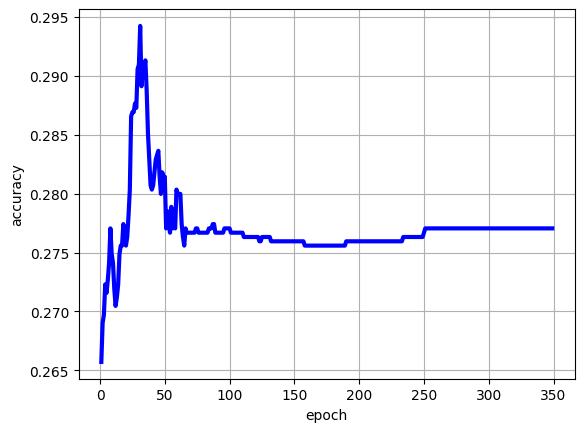

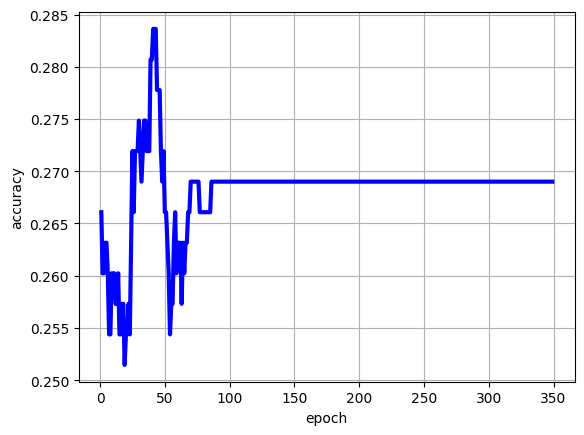

In [19]:
class Model(torch.nn.Module):

    def __init__(self, vocab_size, embedding_size, hidden_size):
        super().__init__()
        self.hidden_size = hidden_size
        
        self.embedding_matrix = torch.nn.Embedding(vocab_size, embedding_size)
        self.rnn_s0 = torch.nn.Parameter(torch.zeros((hidden_size,), dtype=torch.float32))
        self.rnn_cell = torch.nn.Linear(hidden_size + embedding_size, hidden_size)
        self.output_layer = torch.nn.Linear(hidden_size, 1)
        
    def forward(self, x, text_lens):
        batch_size = x.shape[0]
        time_steps = x.shape[1]

        embedded = self.embedding_matrix(x)
        state = self.rnn_s0.unsqueeze(0).tile((batch_size, 1))
        for t in range(time_steps):
            mask = (t < text_lens).unsqueeze(1).tile((1, self.hidden_size))
            next_state = torch.nn.functional.leaky_relu(self.rnn_cell(torch.cat((state, embedded[:, t, :]), dim=1)))
            state = torch.where(mask, next_state, state)
        return self.output_layer(state)
    
         # No need to mask anything here, because we'll be masking the output.  ALTERNATIVE ALONG WIHT TRAIN_Y
#             (state, c) = self.rnn_cell(embedded[:, t, :], (state, c))
#             interm_states.append(state)
#         interm_states = torch.stack(interm_states, dim=1)
#         return self.output_layer(interm_states)

model = Model(len(vocab), embedding_size=2, hidden_size=3)
model.to(device)

optimiser = torch.optim.Adam(model.parameters())

errors = []
errors_val=[] 
train_lossl=[]
validation_lossl=[]

for epoch in range(1, 350):
#     batch_size = train_y_seq.shape[0]   # check it out perhaps DYLAN
#     time_steps = train_y_seq.shape[1]
#     mask = torch.zeros((batch_size, time_steps, 1), dtype=torch.bool)
#     for i in range(batch_size):
#         for j in range(time_steps):
#             if j >= text_lens[i]:
#                 mask[i, j, :] = 1
    
    
    optimiser.zero_grad()
    output = model(indexed_train_x, text_lens)
    output_val = model(indexed_validation_x, text_lens_validation)
    error = torch.nn.functional.binary_cross_entropy_with_logits(output, tensor_t) # handles above from train_y_idx2
   # errors = torch.nn.functional.binary_cross_entropy_with_logits(output, train_y_seq, reduction='none')
   #errors = torch.masked_fill(errors, mask, 0.0)
   #error = errors.sum()/text_lens.sum()
    errors.append(error.detach().tolist())
   
    error.backward()
    
    
    
    output_probs = torch.sigmoid(model(indexed_train_x, text_lens))
    outputs = torch.round(output_probs)
    train_loss=((tensor_t == outputs).type(torch.float32).mean())
    train_lossl.append(train_loss.detach().tolist())
   # train_loss.backward()
    
    output_probs_val = torch.sigmoid(model(indexed_validation_x, text_lens_validation))
    outputs_val = torch.round(output_probs_val)
    validation_loss=((tensor_t_validation == outputs_val).type(torch.float32).mean())
    validation_lossl.append(validation_loss.detach().tolist())
    #validation_loss.backward()
    
    optimiser.step()
    
    
    
    #print('Epoch: ', epoch, 'Error:', errors[-1], 'Accuracy: {:.2%}'.format(accuracy))

    #if epoch%10 == 0:
        
    
print()

# with torch.no_grad():
#     print('sent', 'prediction')
#     outputs = torch.sigmoid(model(indexed_train_x, text_lens))
#     for (sent, output) in zip(x_train_lc, outputs):
#         print(sent, output)

# (fig, ax) = plt.subplots(1, 1)
# ax.set_xlabel('step')
# ax.set_ylabel('$E$')
# ax.plot(range(1, len(errors) + 1), errors, color='blue', linestyle='-', linewidth=3)
# ax.grid()

(fig, ax) = plt.subplots(1, 1)
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
ax.plot(range(1, len(train_lossl) + 1), train_lossl, color='blue', linestyle='-', linewidth=3)
ax.grid()

(fig, ax) = plt.subplots(1, 1)
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
ax.plot(range(1, len(validation_lossl) + 1), validation_lossl, color='blue', linestyle='-', linewidth=3)
ax.grid()

Measure the F1 score performance of the model when applied on the test set.
Also plot a confusion matrix showing how often each genre is mistaken as another genre.

## Title generation (25%)

Now that you've proven that titles and genre are related, make a model that can generate a title given a genre.

Again, you need to generate tokens at the character level instead of the word level and the titles must be lowercased.
Preprocess the data sets, create a neural network, and train it to generate the movie titles given their genre.
Plot a graph of the **perplexity** of the model on the train and validation sets after each epoch.

In [20]:
# use the notebooks of 8 (neural langauge models) and 9 (conditioned lagnuage model) 

 # converting to lowercase

train['title']=train['title'].str.lower()
test['title']=test['title'].str.lower()
validation['title']=validation['title'].str.lower()

# tokenizing into characters

train_lower_char=[list(title) for title in train['title']]
test_lower_char=[list(title) for title in test['title']]
validation_lower_char=[list(title) for title in validation['title']]

#print(train_lower_char)


d_train_l={'title': train_lower_char, 'genre': train['genre']}
d_test_l={'title': test_lower_char, 'genre': test['genre']}
d_validation_l={'title': validation_lower_char, 'genre': validation['genre']}

train_l = pd.DataFrame(d_train_l)
test_l= pd.DataFrame(d_test_l)
validation_l = pd.DataFrame(d_validation_l)

In [26]:
# need an start and end token 
#validation_l

x_train_l = list(train_l['title'])

text_lens = torch.tensor([len(sent) for sent in x_train_l], dtype=torch.int64, device=device)
print('text_lens:', text_lens)
print(len(text_lens))

max_len = int(max(text_lens))
print('max_len:', max_len)

# sentiment here 
#('Action', [0,0,0,0,0]), ('Horror', [0,0,0,0,1]),('Fantasy',[0,0,0,1,0]),('Western',[0,0,1,0,0]),('Adventure',[0,1,0,0,0])
# sentiments = torch.tensor([
#     [0,0,0,0,0],
#     [0,0,0,0,1],
#     [0,0,0,1,0],
#     [0,0,1,0,0],
#     [0,1,0,0,0],
# ], dtype=torch.float32, device=device)

# sentiments = torch.tensor([
#     [1, 0],
#     [0, 1],
#     [1, 0],
#     [0, 1],
# ], dtype=torch.float32, device=device)

# SO what I think is we need to get 2736 rows of this to match all the rows in indexeed/padded train x,
# so if its genre of title is horror then it would have [0,0,0,0,1] and if next one western then matching would be [0,0,1,0,0]


vocab = ['<PAD>','<EDGE>'] + sorted({token for sent in x_train_l for token in sent})
print('vocab:', vocab)
vocab.append('?')
print('vocab:', vocab)

padded_train_x = [['<EDGE>'] + sent + ['<PAD>']*(max_len - len(sent)) for sent in x_train_l]
#print(padded_train_x)

padded_train_y = [sent + ['<EDGE>'] + ['<PAD>']*(max_len - len(sent)) for sent in x_train_l]
#print(padded_train_y)

indexed_train_x = torch.tensor([[vocab.index(token) for token in sent] for sent in padded_train_x], dtype=torch.int64, device=device)
print('indexed_train_x:')
print(indexed_train_x)

indexed_train_y = torch.tensor([[vocab.index(token) for token in sent] for sent in padded_train_y], dtype=torch.int64, device=device)
#print('indexed_train_y:')
#print(indexed_train_y)




# For test set

x_test_l = list(test_l['title'])

text_lens_test = torch.tensor([len(sent) for sent in x_test_l], dtype=torch.int64, device=device)
print('text_lens:', text_lens_test)
print(len(text_lens_test))

max_len_test = int(max(text_lens_test))
print('max_len:', max_len_test)

# vocab_test = ['<PAD>'] + sorted({token for sent in x_test_lc for token in sent})
# print('vocab:', vocab_test)

padded_test_x = [['<EDGE>']+ sent + ['<PAD>']*(max_len_test - len(sent)) for sent in x_test_l]

padded_test_y = [sent + ['<EDGE>'] + ['<PAD>']*(max_len_test - len(sent)) for sent in x_test_l]
#print(padded_validation_x)

indexed_test_x = torch.tensor([[vocab.index(token) for token in sent] for sent in padded_test_x], dtype=torch.int64, device=device)
print('indexed_test_x:')
print(indexed_test_x)

indexed_test_y = torch.tensor([[vocab.index(token) for token in sent] for sent in padded_test_y], dtype=torch.int64, device=device)

# for validation set

x_validation_l = list(validation_l['title'])

text_lens_validation = torch.tensor([len(sent) for sent in x_validation_l], dtype=torch.int64, device=device)
print('text_lens_valid:', text_lens_validation)
print(len(text_lens_validation))

max_len_validation = int(max(text_lens_validation))
print('max_len:', max_len_validation)

# vocab_test = ['<PAD>'] + sorted({token for sent in x_test_lc for token in sent})
# print('vocab:', vocab_test)

padded_validation_x = [['<EDGE>'] + sent + ['<PAD>']*(max_len_validation - len(sent)) for sent in x_validation_l]
#print(padded_validation_x)

padded_validation_y = [sent + ['<EDGE>']+ ['<PAD>']*(max_len_validation - len(sent)) for sent in x_validation_l]

indexed_validation_x = torch.tensor([[vocab.index(token) for token in sent] for sent in padded_validation_x], dtype=torch.int64, device=device)
print('indexed_validation_x:')
print(indexed_validation_x)

indexed_validation_x = torch.tensor([[vocab.index(token) for token in sent] for sent in padded_validation_y], dtype=torch.int64, device=device)

text_lens: tensor([19, 13, 13,  ...,  8, 16, 18])
2736
max_len: 20
vocab: ['<PAD>', '<EDGE>', ' ', '!', '#', '&', "'", ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'á', 'é', 'ñ']
vocab: ['<PAD>', '<EDGE>', ' ', '!', '#', '&', "'", ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'á', 'é', 'ñ', '?']
indexed_train_x:
tensor([[ 1, 43, 21,  ..., 33, 26,  0],
        [ 1, 22,  2,  ...,  0,  0,  0],
        [ 1, 23, 36,  ...,  0,  0,  0],
        ...,
        [ 1, 40, 41,  ...,  0,  0,  0],
        [ 1, 24, 29,  ...,  0,  0,  0],
        [ 1, 41, 29,  ..., 41,  0,  0]])
text_lens: tensor([ 9, 15, 18, 11, 10, 19,  9,  7, 11, 13, 10, 13, 19, 17, 12, 10, 12, 16,
        12, 15, 17, 12

In [66]:
# SO what I think is we need to get 2736 rows of this to match all the rows in indexeed/padded train x,
# so if its genre of title is horror then it would have [0,0,0,0,1] and if next one western then matching would be [0,0,1,0,0]

# sentiments = torch.tensor([
#     [1, 0],
#     [0, 1],
#     [1, 0],
#     [0, 1],
# ], dtype=torch.float32, device=device)

# type(sentiments)

train_sentiments=[]
test_sentiments=[]
validation_sentiments=[]

Horror=[0,0,0,0,1]
Fantasy=[0,0,0,1,0]
Western=[0,0,1,0,0]
Adventure=[0,1,0,0,0]
Action=[1,0,0,0,0]


#('Action', [1,0,0,0,0]), ('Horror', [0,0,0,0,1]),('Fantasy',[0,0,0,1,0]),('Western',[0,0,1,0,0]),('Adventure',[0,1,0,0,0])

for index,row in train_l.iterrows():
    if(row['genre'] == 'Horror'):
        train_sentiments.append(Horror)
        
    elif(row['genre']=='Action'):
        train_sentiments.append(Action)
        
    elif(row['genre']=='Adventure'):
        train_sentiments.append(Adventure)
        
    elif(row['genre']=='Fantasy'):
        train_sentiments.append(Fantasy)
        
    elif(row['genre']=='Western'):
        train_sentiments.append(Western)

for index,row in validation_l.iterrows():
    if(row['genre'] == 'Horror'):
        validation_sentiments.append(Horror)
        
    elif(row['genre']=='Action'):
        validation_sentiments.append(Action)
        
    elif(row['genre']=='Adventure'):
        validation_sentiments.append(Adventure)
        
    elif(row['genre']=='Fantasy'):
        validation_sentiments.append(Fantasy)
        
    elif(row['genre']=='Western'):
        validation_sentiments.append(Western)
        
for index,row in test_l.iterrows():
    if(row['genre'] == 'Horror'):
        test_sentiments.append(Horror)
        
    elif(row['genre']=='Action'):
        test_sentiments.append(Action)
        
    elif(row['genre']=='Adventure'):
        test_sentiments.append(Adventure)
        
    elif(row['genre']=='Fantasy'):
        test_sentiments.append(Fantasy)
        
    elif(row['genre']=='Western'):
        test_sentiments.append(Western)
        

train_sentiments=torch.tensor(train_sentiments, dtype=torch.float32,device=device)
        
    

# len(train_l)

# train_l
# for i in range(len(train_l)):
#     print(i)
    
    
# for x in (train_l):
#     print(x)


In [67]:
# len(validation_sentiments)
# len(train_sentiments)
# len(test_sentiments)
train_sentiments

tensor([[0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0.],
        ...,
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.]])

In [73]:
#MERGE MODEL

class Model(torch.nn.Module):

    def __init__(self, cond_size, vocab_size, embedding_size, hidden_size):
        super().__init__()
        self.embedding_layer = torch.nn.Embedding(vocab_size, embedding_size)
        self.rnn_s0 = torch.nn.Parameter(torch.zeros((hidden_size,), dtype=torch.float32))
        self.rnn_c0 = torch.nn.Parameter(torch.zeros((hidden_size,), dtype=torch.float32))
        self.rnn_cell = torch.nn.LSTMCell(embedding_size, hidden_size)
        self.output_layer = torch.nn.Linear(cond_size + hidden_size, vocab_size) # Output layer must include the conditioning vector in its input.
        
    def forward(self, cond, x):
        batch_size = x.shape[0]
        time_steps = x.shape[1]

        embedded = self.embedding_layer(x)
        
        state = self.rnn_s0.unsqueeze(0).tile((batch_size, 1))
        c = self.rnn_s0.unsqueeze(0).tile((batch_size, 1))
        interm_states = []
        for t in range(time_steps):
            (state, c) = self.rnn_cell(embedded[:, t, :], (state, c))
            interm_states.append(state)
        interm_states = torch.stack(interm_states, dim=1)
        
        cond_3d = cond.unsqueeze(1).tile((1, time_steps, 1)) # Replicate the same conditioning vector for every word.
        interm_states = torch.cat((cond_3d, interm_states), dim=2) # Attach the replicated conditioning vector to the intermediate states.
        
        return self.output_layer(interm_states)

model = Model(train_sentiments.shape[1], len(vocab), embedding_size=2, hidden_size=2)
model.to(device)

optimiser = torch.optim.Adam(model.parameters())

print('step', 'error')
train_errors = []
for step in range(1, 5000+1):
    batch_size = indexed_train_x.shape[0]
    time_steps = indexed_train_x.shape[1]
    mask = torch.zeros((batch_size, time_steps), dtype=torch.bool)
    for i in range(batch_size):
        for j in range(time_steps):
            if j >= text_lens[i]:
                mask[i, j] = 1
    
    optimiser.zero_grad()
    output = model(train_sentiments, indexed_train_x)
    errors = torch.nn.functional.cross_entropy(output.transpose(1, 2), indexed_train_y, reduction='none')
    errors = torch.masked_fill(errors, mask, 0.0)
    error = errors.sum()/text_lens.sum()
    train_errors.append(error.detach().tolist())
    error.backward()
    optimiser.step()

    if step%100 == 0:
        print(step, train_errors[-1])
print()

#('positive', [1, 0]), ('negative', [0, 1])
#('Action', [1,0,0,0,0]), ('Horror', [0,0,0,0,1]),('Fantasy',[0,0,0,1,0]),('Western',[0,0,1,0,0]),('Adventure',[0,1,0,0,0])
# with torch.no_grad():  
    
#     for (name, sentiment) in [('Action', [1,0,0,0,0]), ('Horror', [0,0,0,0,1]),('Fantasy',[0,0,0,1,0]),('Western',[0,0,1,0,0]),('Adventure',[0,1,0,0,0])]:
#         print(name)
#         sentiment = torch.tensor([sentiment], dtype=torch.float32)
#         prefix_indexes = [vocab.index('<EDGE>')]
#         max_words = 10
#         for _ in range(max_words):
#             prefix_tensor = torch.tensor([prefix_indexes], dtype=torch.int64)
#             outputs = torch.softmax(model(sentiment, prefix_tensor), dim=2)
#             word_probs = outputs[0, -1, :].tolist()
#             next_word_index = random.choices(range(len(vocab)), word_probs)[0]
#             if next_word_index == vocab.index('<EDGE>'):
#                 break
#             prefix_indexes.append(next_word_index)
#         sent = [vocab[index] for index in prefix_indexes[1:]]
#         print(sent)
#         print()
        
        
# instead of this:
# ('positive', [1, 0]), ('negative', [0, 1])

# You do this:
# (action, [0,0,0,0,0]),(western,[1,0,0,0]) etc...
# [3:54 PM]
# So you replace them with your 5 genres

step error
100 3.7169976234436035
200 3.4226648807525635
300 3.2490901947021484
400 3.1587071418762207
500 3.1103806495666504
600 3.0827486515045166
700 3.0656206607818604
800 3.053924798965454
900 3.044830322265625
1000 3.0362319946289062
1100 3.025376796722412
1200 3.009207248687744
1300 2.9909825325012207
1400 2.9726064205169678
1500 2.951944589614868
1600 2.930243492126465
1700 2.9106199741363525
1800 2.893982410430908
1900 2.8798396587371826
2000 2.867987871170044
2100 2.8581604957580566
2200 2.849807024002075
2300 2.842658281326294
2400 2.83652925491333
2500 2.8311221599578857
2600 2.826146125793457
2700 2.8213624954223633
2800 2.8165948390960693
2900 2.8118109703063965
3000 2.8070688247680664
3100 2.8021438121795654
3200 2.796797752380371
3300 2.7909739017486572
3400 2.784646987915039
3500 2.777144193649292
3600 2.768918514251709
3700 2.759310245513916
3800 2.7500476837158203
3900 2.7437446117401123
4000 2.738961696624756
4100 2.7347145080566406
4200 2.730341911315918
4300 2.725

In [ ]:
#BEAM SEARCH

def get_bow(sent, word2index):
    words = {word for word in sent if word in word2index}
    bow = [0]*len(word2index)
    for word in words:
        bow[word2index[word]] = 1
    return bow

class Model(torch.nn.Module):

    def __init__(self, vocab_size, cond_size, embedding_size, hidden_size):
        super().__init__()
        self.embedding_layer = torch.nn.Embedding(vocab_size, embedding_size)
        self.cond_layer = torch.nn.Linear(vocab_size, cond_size)
        self.rnn_s0 = torch.nn.Parameter(torch.zeros((hidden_size,), dtype=torch.float32))
        self.rnn_c0 = torch.nn.Parameter(torch.zeros((hidden_size,), dtype=torch.float32))
        self.rnn_cell = torch.nn.LSTMCell(embedding_size, hidden_size)
        self.output_layer = torch.nn.Linear(cond_size + hidden_size, vocab_size)

    def forward(self, x, bow):
        batch_size = x.shape[0]
        time_steps = x.shape[1]

        embedded = self.embedding_layer(x)
        cond = self.cond_layer(bow)
        
        state = self.rnn_s0.unsqueeze(0).tile((batch_size, 1))
        c = self.rnn_s0.unsqueeze(0).tile((batch_size, 1))
        interm_states = []
        for t in range(time_steps):
            (state, c) = self.rnn_cell(embedded[:, t, :], (state, c))
            interm_states.append(state)
        interm_states = torch.stack(interm_states, dim=1)
        
        cond_3d = cond.unsqueeze(1).tile((1, time_steps, 1))
        interm_states = torch.cat((cond_3d, interm_states), dim=2)
        return self.output_layer(interm_states)

model = Model(len(vocab), cond_size=16, embedding_size=16, hidden_size=16)
model.to(device)

optimiser = torch.optim.Adam(model.parameters(), lr=0.1)

print('step', 'error')
train_errors = []
for step in range(1, 1000+1):
    batch_size = indexed_train_x.shape[0]
    time_steps = indexed_train_x.shape[1]
    mask = torch.zeros((batch_size, time_steps), dtype=torch.bool)
    for i in range(batch_size):
        for j in range(time_steps):
            if j >= text_lens[i]:
                mask[i, j] = 1
    
    optimiser.zero_grad()
    output = model(indexed_train_x, bow_train_x)
    errors = torch.nn.functional.cross_entropy(output.transpose(1, 2), indexed_train_y, reduction='none')
    errors = torch.masked_fill(errors, mask, 0.0)
    error = errors.sum()/text_lens.sum()
    train_errors.append(error.detach().tolist())
    error.backward()
    optimiser.step()

    if step%50 == 0:
        print(step, train_errors[-1])
print()

def generate(conditioning_vector, beam_size, max_len):
    with torch.no_grad():
        conditioning_tensor = torch.tensor([conditioning_vector], dtype=torch.float32, device=device)
        beam = [(1.0, [vocab.index('<EDGE>')])]
        best_complete_sent = (0.0, [])
        for _ in range(max_len):
            new_beam = []
            for (prefix_prob, prefix_indexes) in beam:
                prefix_tensor = torch.tensor([prefix_indexes], dtype=torch.int64, device=device)
                outputs = torch.softmax(model(prefix_tensor, conditioning_tensor), dim=2)
                word_probs = outputs[0, -1, :].numpy()
                new_prefix_probs = prefix_prob*word_probs
                for (next_word_index, new_prefix_prob) in enumerate(new_prefix_probs.tolist()):
                    new_entry = (new_prefix_prob, prefix_indexes + [next_word_index])
                    if next_word_index == vocab.index('<EDGE>'):
                        if new_prefix_prob > best_complete_sent[0]:
                            best_complete_sent = new_entry
                    else:
                        new_beam.append(new_entry)
            new_beam.sort(reverse=True)
            beam = new_beam[:beam_size]
            if best_complete_sent[0] > new_beam[0][0]:
                break
        sent = [vocab[index] for index in best_complete_sent[1][1:-1]]
        return (sent, best_complete_sent[0])

bow = bow_train_x[0].tolist()
print([vocab[i] for (i, x) in enumerate(bow) if x])
(sent, prob) = generate(bow, beam_size=3, max_len=10)
print(sent, prob)

(fig, ax) = plt.subplots(1, 1)
ax.set_xlabel('step')
ax.set_ylabel('$E$')
ax.plot(range(1, len(train_errors) + 1), train_errors, color='blue', linestyle='-', linewidth=3)
ax.grid()

Generate 3 titles for every genre.
Make sure that the titles are not all the same.

In [75]:
for i in range(3):
    with torch.no_grad():  

        for (name, sentiment) in [('Action', [1,0,0,0,0]), ('Horror', [0,0,0,0,1]),('Fantasy',[0,0,0,1,0]),('Western',[0,0,1,0,0]),('Adventure',[0,1,0,0,0])]:
            print(name)
            sentiment = torch.tensor([sentiment], dtype=torch.float32)
            prefix_indexes = [vocab.index('<EDGE>')]
            max_words = 10
            for _ in range(max_words):
                prefix_tensor = torch.tensor([prefix_indexes], dtype=torch.int64)
                outputs = torch.softmax(model(sentiment, prefix_tensor), dim=2)
                word_probs = outputs[0, -1, :].tolist()
                next_word_index = random.choices(range(len(vocab)), word_probs)[0]
                if next_word_index == vocab.index('<EDGE>'):
                    break
                prefix_indexes.append(next_word_index)
            sent = [vocab[index] for index in prefix_indexes[1:]]
            print(sent)
            print()

Action
['m', 'e', 't', 'r', 'h', 'a', 'l', 's', 'h', 'u']

Horror
['r', ' ', 't', 'e', 'o', 'l', 'a', 'b', 'o', 'k']

Fantasy
['t', 'a', 'g', 'e', 'm', 'i', 'm', 'i', 'n', 'c']

Western
['t', 'a', 'n', '9', 'a', 'h', 'r', 'b', 'e', 's']

Adventure
['0', 'l', 'e', 'u', 'w', 'e', 'h', 'a', 'w', 'o']

Action
['t', 'e', 'r', ' ', '6', 'u', 'p', 'e', 'l', 'o']

Horror
['f', 'n', 'u', 'c', 'i', 't', ' ', 'w', 'l', 'e']

Fantasy
['g', 'r', 'a', 'c', 'e', 'r', 'e', 'w', 'a', 'y']

Western
['k', 'e', ' ', 'c', 'a', 'n', 'p', ' ', 't', 'r']

Adventure
['w', 'o', 't', 'l', 'r', 'l', 'h', 'l', 'i', 'u']

Action
['f', 'e', ' ', 't', 'r', 'e', ' ', 'x', 'e', 'i']

Horror
['s', 'i', 'n', 's', ' ', 'i', 'n', 't', 'h', 'o']

Fantasy
['j', 'a', 'v', 'u', 'a', 'g', 'y', ' ', 't', 'e']

Western
[' ', 'f', ' ', 't', 'u', 'r', 'e', 'v', 'a', 'n']

Adventure
['0', 'n', 'e', 'w', 'e', 'a', 's', ' ', 't', 'a']



## Language models as classifiers (30%)

It occurs to you that the movie title generator can also be used as a classifier by doing the following:

* Let title $t$ be the title that you want to classify.
* For every genre $g$,
    * Use the generator as a language model to get the probability of $t$ (the whole title) using genre $g$.
* Pick the genre that makes the language model give the largest probability.

The producer is thrilled to not need two separate models and now you have to implement this.
**Use the preprocessed test set from the previous task** in order to find the genre that makes the language model give the largest probability.
There is no need to plot anything here.

Just like in the classification task, measure the F1 score and plot the confusion matrix of this new classifier.

Write a paragraph or psuedo code to describe what your code above does.

In [ ]:
'''

'''

## Conclusion (10%)

The producer's funders are asking for a report about this new technology they invested in.
In 300 words, write your interpretation of the results together with what you think could make the model perform better.

In [ ]:
'''

'''